### 회귀 트리
- 회귀 함수를 기반으로 하지 않고 결정 트리와 같이 트리를 기반으로 하는 회귀 방식
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측
- 리프 노드에서 예측 결정 값을 만드는 과정에서 분류 트리가 특정 클래스 레이블을 결정하는 것과 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산
- 결정트리, 랜덤 포레스트, GBM, XGBOOST, LIGHTGBM 등 트리 기반의 알고리즘은 분류뿐만 아니라 회귀도 가능한데 트리 생성이 CART(Classification And Regression Trees)에 기반하고 있기 때문이며 CART는 분류뿐만 아니라 회귀도 가능하게 해주는 트리 생성 알고리즘임

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [2]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
boston_df['PRICE'] = boston.target
y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis = 1, inplace = False)

rf = RandomForestRegressor(random_state = 0, n_estimators = 1000)

neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)

avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 - mse : ', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 rmse : ', np.round(rmse_scores, 2))
print('5 교차 검증의 평균 rmse : ', np.round(avg_rmse, 2))

5 교차 검증의 개별 - mse :  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 rmse :  [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 rmse :  4.42


In [4]:
def get_model_cv_prediction(model, X_data, y_target) :
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    
    print('######', model.__class__.__name__, '######')
    print('5 교차 평균 rmse : {0:.3f}'.format(avg_rmse), '\n')

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = 4)
rf_reg = RandomForestRegressor(random_state = 0, n_estimators = 1000)
gb_reg = GradientBoostingRegressor(random_state = 0, n_estimators = 1000)
xgb_reg = XGBRegressor(n_estimators = 1000)
lgb_reg = LGBMRegressor(n_estimators = 1000)

models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models :
    get_model_cv_prediction(model, X_data, y_target)

###### DecisionTreeRegressor ######
5 교차 평균 rmse : 5.978 

###### RandomForestRegressor ######
5 교차 평균 rmse : 4.423 

###### GradientBoostingRegressor ######
5 교차 평균 rmse : 4.269 

###### XGBRegressor ######
5 교차 평균 rmse : 4.251 

###### LGBMRegressor ######
5 교차 평균 rmse : 4.646 



<AxesSubplot:>

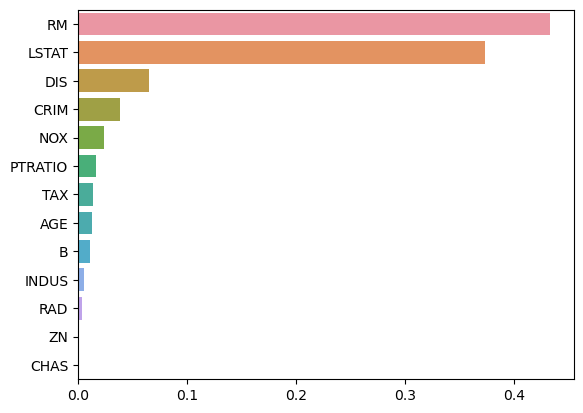

In [6]:
import seaborn as sns

rf_reg = RandomForestRegressor(n_estimators = 1000)

rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data = rf_reg.feature_importances_, index = X_data.columns)
feature_series = feature_series.sort_values(ascending = False)

sns.barplot(x = feature_series, y = feature_series.index)

(100, 2)


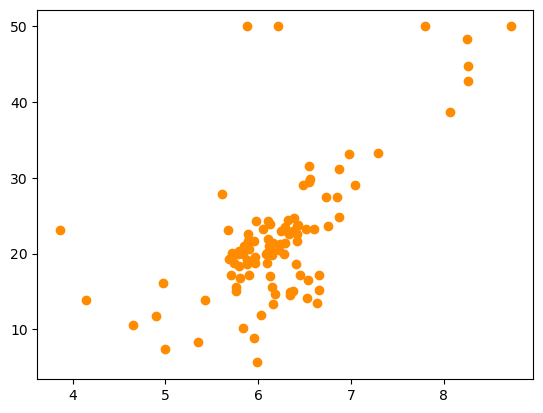

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

boston_df_sample = boston_df[['RM', 'PRICE']]

boston_df_sample = boston_df_sample.sample(random_state = 0, n = 100)

print(boston_df_sample.shape)

plt.figure()

plt.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c = 'darkorange')

plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth = 2)
rf_reg7 = DecisionTreeRegressor(max_depth = 7)

X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

X_feature = boston_df_sample['RM'].values.reshape(-1, 1)
y_target = boston_df_sample['PRICE'].values.reshape(-1, 1)

lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

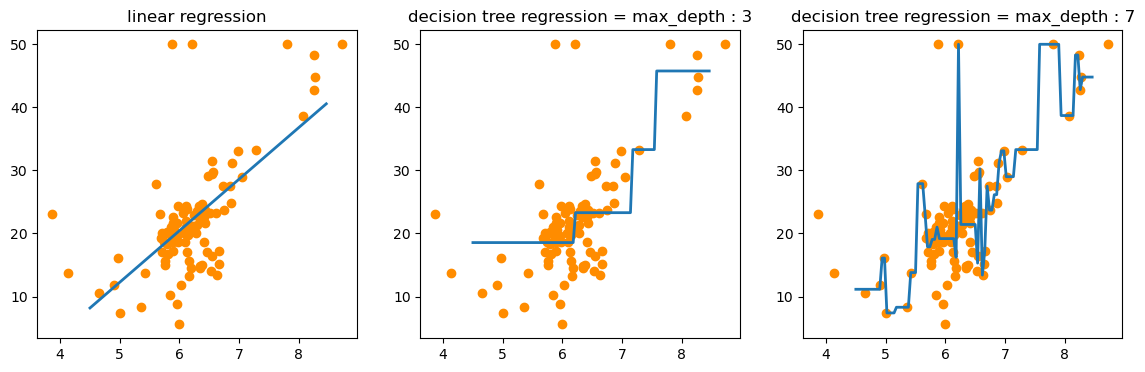

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (14, 4), ncols = 3)

ax1.set_title('linear regression')
ax1.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c = 'darkorange')
ax1.plot(X_test, pred_lr, label = 'linear', linewidth = 2)

ax2.set_title('decision tree regression = max_depth : 3')
ax2.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c = 'darkorange')
ax2.plot(X_test, pred_rf2, label = 'max_depth : 3', linewidth = 2)

ax3.set_title('decision tree regression = max_depth : 7')
ax3.scatter(boston_df_sample.RM, boston_df_sample.PRICE, c = 'darkorange')
ax3.plot(X_test, pred_rf7, label = 'max_depth : 7', linewidth = 2)

plt.show()

In [10]:
bike_df = pd.read_csv('../machinerunning/data.machine/bike_train.csv')

print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [11]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [12]:
bike_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [13]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [14]:
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop (drop_columns, axis = 1, inplace = True)

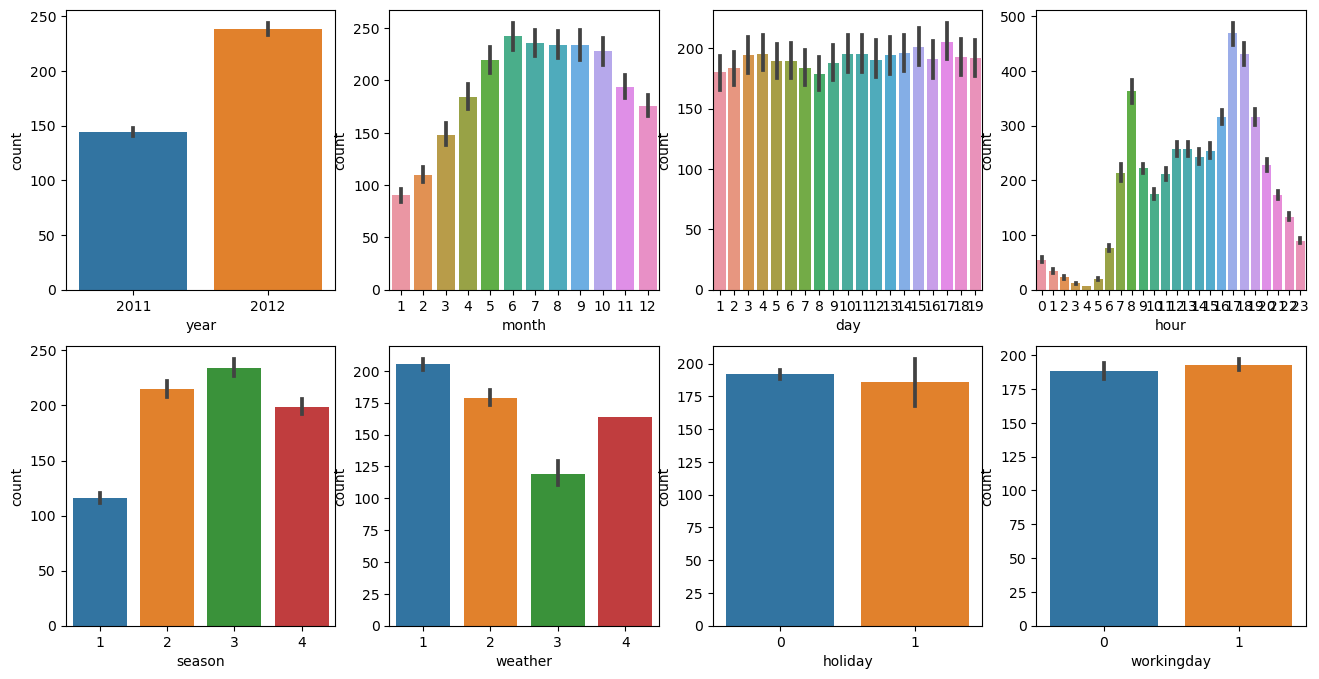

In [16]:
fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
cat_features = ['year', 'month', 'day', 'hour', 'season', 'weather', 'holiday', 'workingday']

for i, feature in enumerate(cat_features) :
    row = int(i / 4)
    col = i % 4
    
    sns.barplot(x = feature, y = 'count', data = bike_df, ax = axs[row][col])
    

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def rmsle(y, pred) :
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    
    return rmsle
def rmse(y, pred) :
    return np.sqrt(mean_squared_error(y, pred))

def evaluate_regr(y, pred) :
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    
    mae_val = mean_absolute_error(y, pred)
    print('rmsle :  {0:.3f}, rmse : {1:.3f}, mae : {2:.3f}'.format(rmsle_val, rmse_val, mae_val))

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state = 0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

pred = lr_reg.predict(X_test)

evaluate_regr(y_test, pred)

rmsle :  1.165, rmse : 140.900, mae : 105.924


In [28]:
def get_top_error_data(y_test, pred, n_tops = 5) :
    result_df = pd.DataFrame(y_test.values, columns = ['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    
    print(result_df.sort_values('diff', ascending = False)[:n_tops])
    
get_top_error_data(y_test, pred, n_tops = 5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<AxesSubplot:>

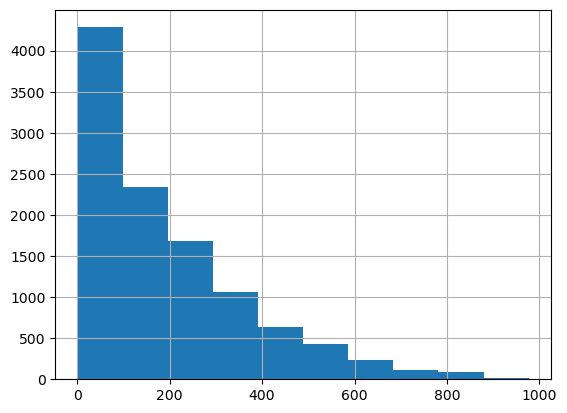

In [30]:
y_target.hist()

<AxesSubplot:>

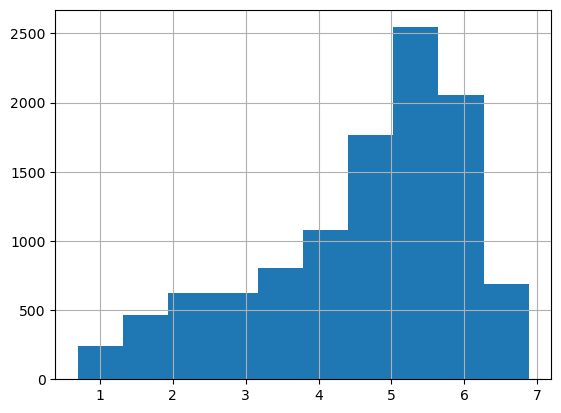

In [32]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [35]:
y_target_log = np.log1p(y_target)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size = 0.3, random_state = 0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)

pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)

rmsle :  1.017, rmse : 162.594, mae : 109.286


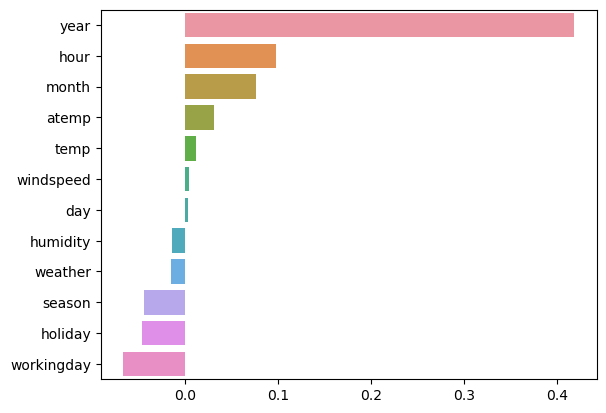

In [37]:
coef = pd.Series(lr_reg.coef_, index = X_features.columns)
coef_sort = coef.sort_values(ascending = False)
sns.barplot(x = coef_sort.values, y= coef_sort.index)
plt.savefig('log_transform.tif', format = 'tif', dpi = 300, bbox_inches = 'tight')

In [39]:
X_features_ohe = pd.get_dummies(X_features, columns = ['year', 'month', 'day', 'hour', 'holiday', 'workingday',
                                                       'season', 'weather'])


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                   test_size = 0.3, random_state = 0)

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = False) :
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
        
    print('###', model.__class__.__name__, '###')
    evaluate_regr(y_test, pred)
    
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha = 10)
lasso_reg = Lasso(alpha = 0.01)

for model in [lr_reg, ridge_reg, lasso_reg] :
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = True)

### LinearRegression ###
rmsle :  0.590, rmse : 97.687, mae : 63.382
### Ridge ###
rmsle :  0.590, rmse : 98.529, mae : 63.893
### Lasso ###
rmsle :  0.635, rmse : 113.219, mae : 72.803


<AxesSubplot:>

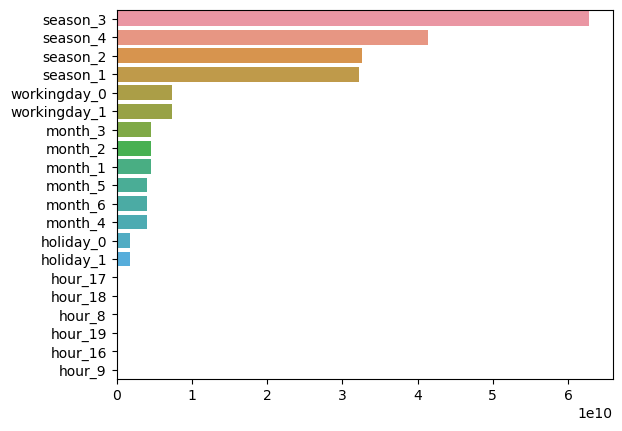

In [50]:
coef = pd.Series(lr_reg.coef_, index = X_features_ohe.columns)
coef_sort = coef.sort_values(ascending = False)[:20]
sns.barplot(x = coef_sort.values, y = coef_sort.index)

In [52]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf_reg = RandomForestRegressor(n_estimators = 500)
gbm_reg = GradientBoostingRegressor(n_estimators = 500)
xgb_reg = XGBRegressor(n_estimators = 500)
lgbm_reg = LGBMRegressor(n_estimators = 500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg] :
    
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test, is_expm1 = True)

### RandomForestRegressor ###
rmsle :  0.354, rmse : 50.448, mae : 31.228
### GradientBoostingRegressor ###
rmsle :  0.330, rmse : 53.329, mae : 32.738
### XGBRegressor ###
rmsle :  0.342, rmse : 51.732, mae : 31.251
### LGBMRegressor ###
rmsle :  0.319, rmse : 47.215, mae : 29.029
